Este teste envolve predições com os algoritmos de SVM, árvores de decisão e redes neurais artificiais.

# Atividade 1

Avalie o desempenho das SVM's com kernel RBF na base de dados Iris. Exiba os resultados de acurácia (e a matriz de confusão) para um cenário onde apenas duas features da base são utilizadas (como os exemplos feitos em sala de aula), outro cenário onde três das quatro features são utilizadas e um último cenário onde o classificador é treinado e avaliado utilizado todas as features disponíveis no dataset. Para particionar os dados, reserve 80% para treinamento e 20% para testes.

**Responda apresentando todos os experimentos solicitados: aumentar a quantidade de dados para treinamento / teste melhora os resultados do classificador?**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()

### Duas features

In [3]:
x2 = iris.data[:, [0,2]]
y = iris.target

In [4]:
x2_train, x2_test, y_train, y_test = train_test_split(x2,y,test_size=0.2,
                                                      random_state=42)
len(x2_train), len(x2_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [5]:
rbf_2 = svm.SVC(kernel='rbf',C=1,gamma='auto').fit(x2_train,y_train)
rbf_2

SVC(C=1, gamma='auto')

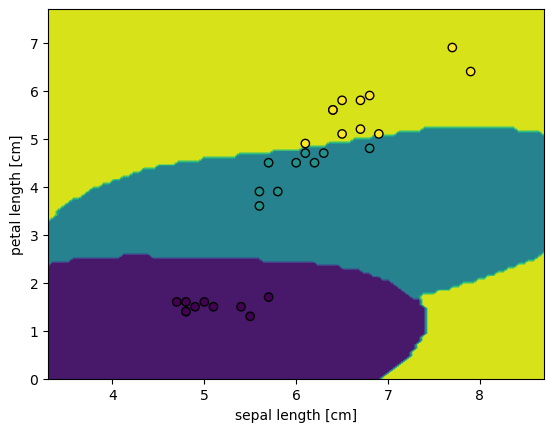

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(rbf_2,x2_train,
                                              response_method="predict",
                                              xlabel='sepal length [cm]',
                                              ylabel='petal length [cm]')
disp.ax_.scatter(x2_test[:, 0], x2_test[:, 1], c=y_test, edgecolor="k")

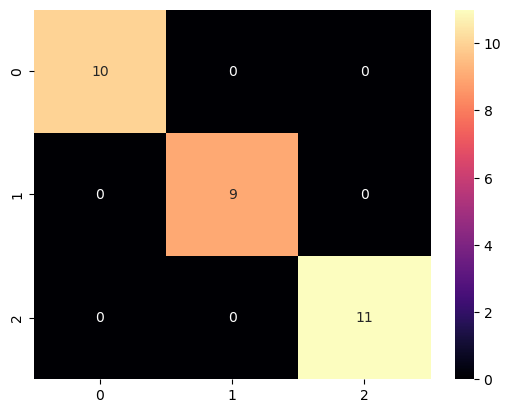

In [7]:
y_pred = rbf_2.predict(x2_test)
mc = confusion_matrix(y_test, y_pred)

import seaborn as sns

heatmap = sns.heatmap(mc, cmap='magma', annot=True)

In [8]:
print("Acurácia:",accuracy_score(y_test,y_pred))

Acurácia: 1.0


### 3 features

In [9]:
x3 = iris.data[:, [0,3]]
y = iris.target

In [10]:
x3_train, x3_test, y_train, y_test = train_test_split(x3,y,test_size=0.2,
                                                      random_state=42)
len(x3_train), len(x3_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [11]:
rbf_3 = svm.SVC(kernel='rbf',C=1,gamma='auto').fit(x3_train,y_train)
rbf_3

SVC(C=1, gamma='auto')

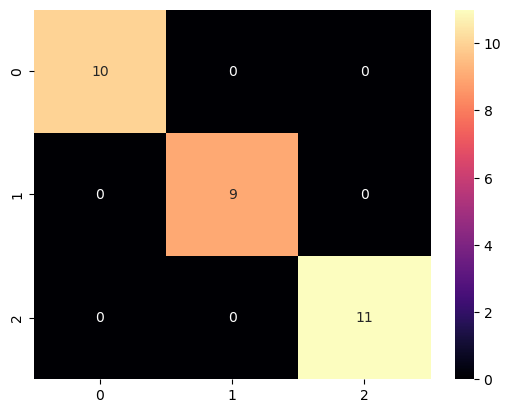

In [12]:
y_pred = rbf_3.predict(x3_test)
mc = confusion_matrix(y_test, y_pred)

import seaborn as sns

heatmap = sns.heatmap(mc, cmap='magma', annot=True)

In [13]:
print("Acurácia:",accuracy_score(y_test,y_pred))

Acurácia: 1.0


### 4 features

In [14]:
x = iris.data[:, :]
y = iris.target

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                    random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(120, 30, 120, 30)

In [16]:
rbf = svm.SVC(kernel='rbf',C=1,gamma='auto').fit(x_train,y_train)
rbf

SVC(C=1, gamma='auto')

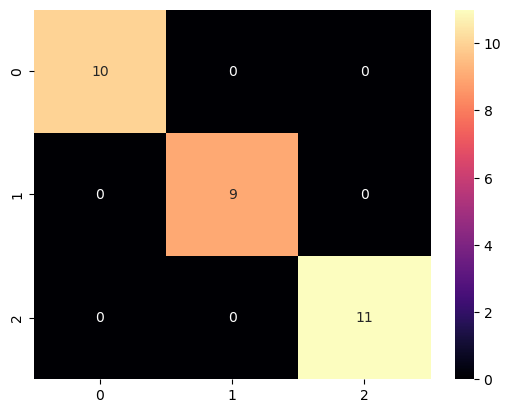

In [17]:
y_pred = rbf.predict(x_test)
mc = confusion_matrix(y_test, y_pred)

import seaborn as sns

heatmap = sns.heatmap(mc, cmap='magma', annot=True)

In [18]:
print("Acurácia:",accuracy_score(y_test,y_pred))

Acurácia: 1.0


Para este caso, aumentar os dados de treinamento não faz nenhuma diferença no resultado.

# Atividade 2

Compare o desempenho das ávores de decisão com as redes neurais artificiais no dataset Iris. Para a avaliação, utilize as duas features do dataset (conforme exemplos apresentados em sala de aula). Particione os dados em 80% para treinamento e 20% para teste.

**Responda com base em todos os experimentos solicitados: qual algoritmo teve melhor desempenho em termos de acurácia no dataset?**

Requisitos adicionais:
* A rede neural deve ter uma camada oculta com 10 neurônios;
* Exiba a árvore de decisão de maneira gráfica. 
* Exiba a matriz de confusão de forma gráfica.
* Exiba as regiões de decisão dos dois algoritmos.

### Árvore de decisão

In [19]:
from sklearn import tree
import graphviz

In [20]:
x = iris.data[:, [0,2]]
y = iris.target

In [21]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=.2,
                                                     random_state=42)

In [22]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

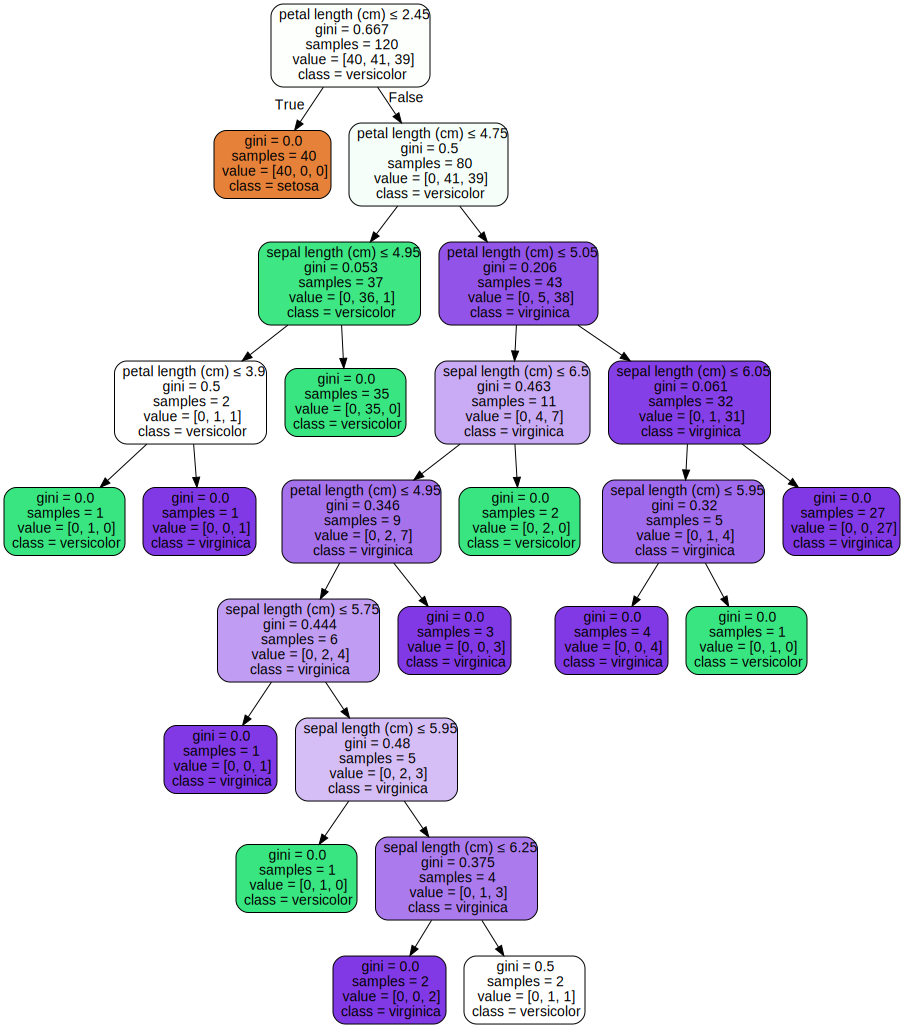

In [23]:
dot_data = tree.export_graphviz(tree_clf,
                                feature_names=np.array(iris.feature_names)[[0,2]],
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

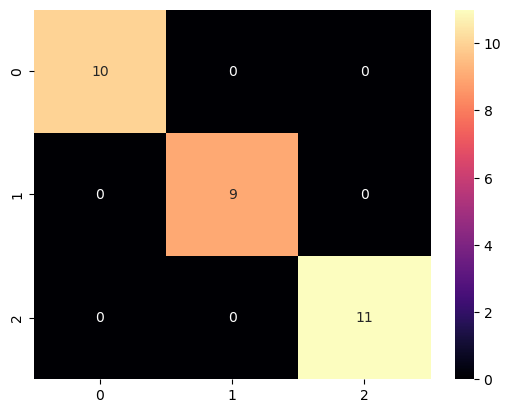

In [24]:
y_pred = tree_clf.predict(x_test)

mc = confusion_matrix(y_test, y_pred)

mc_heatmap = sns.heatmap(mc, cmap="magma", annot=True)

Acurácia: 1.0


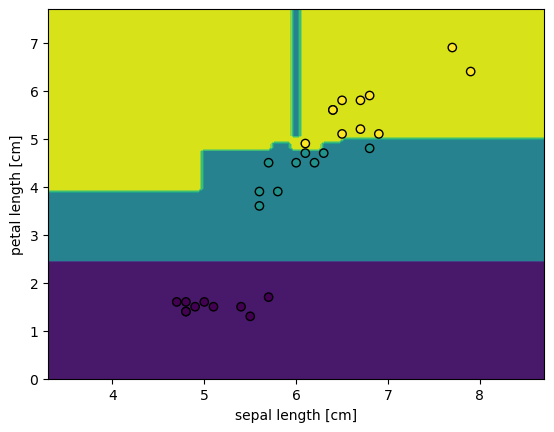

In [25]:
disp = DecisionBoundaryDisplay.from_estimator(tree_clf,x_train,
                                              response_method="predict",
                                              xlabel="sepal length [cm]",
                                              ylabel="petal length [cm]")
disp.ax_.scatter(x_test[:, 0],x_test[:, 1],c=y_test,edgecolor="k")
print("Acurácia:",accuracy_score(y_test,y_pred))

### Rede neural

In [26]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [27]:
x = iris.data[:, [0,2]]
y = iris.target

In [28]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=.2,
                                                     random_state=42)

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=60, alpha=1e-4,
                    solver="sgd", verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [30]:
mlp.fit(x_train, y_train)
print(mlp.score(x_train, y_train))
print("\n",mlp.score(x_test, y_test))

Iteration 1, loss = 1.45916467
Iteration 2, loss = 1.13693081
Iteration 3, loss = 1.13836145
Iteration 4, loss = 1.11219766
Iteration 5, loss = 1.06055877
Iteration 6, loss = 1.04883636
Iteration 7, loss = 0.99802158
Iteration 8, loss = 0.91033632
Iteration 9, loss = 0.84434469
Iteration 10, loss = 0.77440185
Iteration 11, loss = 0.71345651
Iteration 12, loss = 0.63315979
Iteration 13, loss = 0.57833024
Iteration 14, loss = 0.53233999
Iteration 15, loss = 0.49504164
Iteration 16, loss = 0.46505768
Iteration 17, loss = 0.44622992
Iteration 18, loss = 0.43137285
Iteration 19, loss = 0.41942421
Iteration 20, loss = 0.40919063
Iteration 21, loss = 0.39986828
Iteration 22, loss = 0.39108162
Iteration 23, loss = 0.38257131
Iteration 24, loss = 0.37404470
Iteration 25, loss = 0.36539605
Iteration 26, loss = 0.35665362
Iteration 27, loss = 0.34780455
Iteration 28, loss = 0.33885321
Iteration 29, loss = 0.32988368
Iteration 30, loss = 0.32107782
Iteration 31, loss = 0.31265661
Iteration 32, los

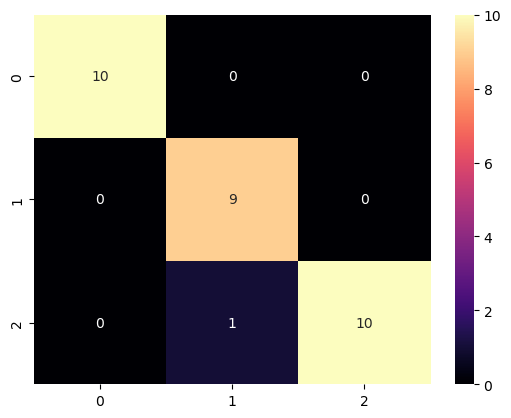

In [31]:
y_pred = mlp.predict(x_test)

mc = confusion_matrix(y_test, y_pred)

mc_heatmap = sns.heatmap(mc, cmap="magma", annot=True)

Acurácia: 0.9666666666666667


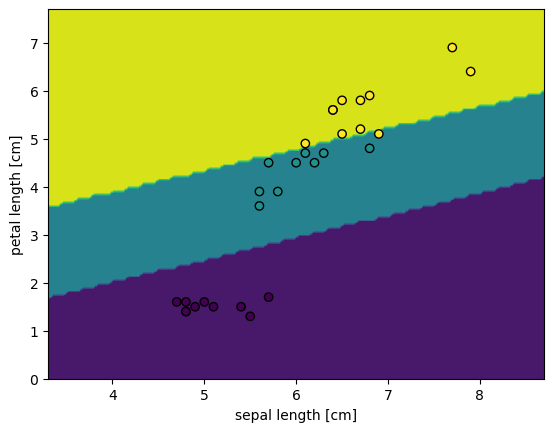

In [32]:
disp = DecisionBoundaryDisplay.from_estimator(mlp,x_train,
                                              response_method="predict",
                                              xlabel="sepal length [cm]",
                                              ylabel="petal length [cm]")
disp.ax_.scatter(x_test[:, 0],x_test[:, 1],c=y_test,edgecolor="k")
print("Acurácia:",accuracy_score(y_test,y_pred))

O algoritmo com melhor desempenho foi a árvore de decisão

# Atividade 3

Avalie o desempenho de diferentes arquiteturas de redes neurais no dataset Iris dataset em termos de acurácia, considerando todas as 4 features do dataset. Para o particionamento, utilize 80% para treinamento e 20% para teste.

Arquiteturas:
* Rede neural com apenas uma camada oculta com 10 neurônios;
* Rede neural com duas camadas ocultas com 10 neurônios cada;
* Rede neural com apenas uma camada oculta com 20 neurônios.

** Responda, considerando todos os experimentos realizados: aumentar o número de neurônios da camada oculta, ou aumentar o número de camadas ocultas teve algum impacto positivo nos resultados, com relação ao modelo que tem apenas uma camada com 10 neurônios?**

### Rede neural, 1 camada oculta, 10 neurônios

In [33]:
x = iris.data[:, :]
y = iris.target

In [34]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=.2,
                                                     random_state=42)

In [35]:
mlp_1 = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, alpha=1e-4,
                      solver="sgd", verbose=10, tol=1e-4, random_state=1,
                      learning_rate_init=.1)

In [36]:
mlp_1.fit(x_train, y_train)
print(mlp_1.score(x_train, y_train))
print("\n",mlp_1.score(x_test, y_test))

Iteration 1, loss = 1.47437059
Iteration 2, loss = 1.44671221
Iteration 3, loss = 1.05824875
Iteration 4, loss = 0.80204763
Iteration 5, loss = 0.77594962
Iteration 6, loss = 0.71642070
Iteration 7, loss = 0.65046979
Iteration 8, loss = 0.58901308
Iteration 9, loss = 0.52905047
Iteration 10, loss = 0.48095525
Iteration 11, loss = 0.44222327
Iteration 12, loss = 0.40740620
Iteration 13, loss = 0.37548837
Iteration 14, loss = 0.34392350
Iteration 15, loss = 0.31882137
Iteration 16, loss = 0.36227221
Iteration 17, loss = 1.20187362
Iteration 18, loss = 2.56296164
Iteration 19, loss = 0.45788206
Iteration 20, loss = 0.54986837
Iteration 21, loss = 0.46916431
Iteration 22, loss = 0.40209536
Iteration 23, loss = 0.40253858
Iteration 24, loss = 0.39015153
Iteration 25, loss = 0.38295233
Iteration 26, loss = 0.37442820
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.8916666666666667

 0.8


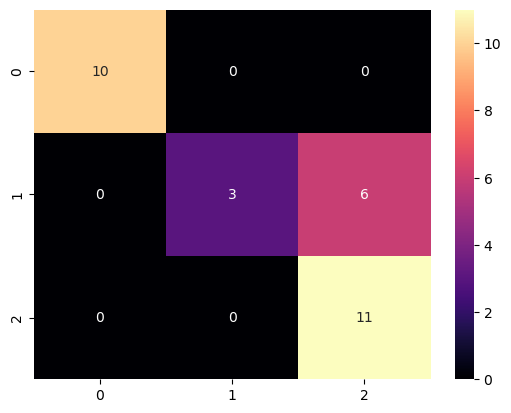

In [37]:
y_pred = mlp_1.predict(x_test)

mc = confusion_matrix(y_test, y_pred)

mc_heatmap = sns.heatmap(mc, cmap="magma", annot=True)

### Rede neural, 2 camadas ocultas, 10 neurônios cada

In [38]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=100, alpha=1e-4,
                      solver="sgd", verbose=10, tol=1e-4, random_state=1,
                      learning_rate_init=.1)

In [39]:
mlp_2.fit(x_train, y_train)
print(mlp_2.score(x_train, y_train))
print("\n",mlp_2.score(x_test, y_test))

Iteration 1, loss = 1.95335142
Iteration 2, loss = 1.41336413
Iteration 3, loss = 1.23088173
Iteration 4, loss = 1.14292374
Iteration 5, loss = 1.11152312
Iteration 6, loss = 1.06763600
Iteration 7, loss = 1.05748863
Iteration 8, loss = 1.24668477
Iteration 9, loss = 1.39667474
Iteration 10, loss = 1.07716029
Iteration 11, loss = 1.00849722
Iteration 12, loss = 0.99943638
Iteration 13, loss = 0.98620828
Iteration 14, loss = 0.93818813
Iteration 15, loss = 0.89091099
Iteration 16, loss = 0.82657130
Iteration 17, loss = 0.75227269
Iteration 18, loss = 0.68319817
Iteration 19, loss = 0.64345858
Iteration 20, loss = 0.61785273
Iteration 21, loss = 0.58401773
Iteration 22, loss = 0.55040155
Iteration 23, loss = 0.52225233
Iteration 24, loss = 0.49775249
Iteration 25, loss = 0.47646435
Iteration 26, loss = 0.45845748
Iteration 27, loss = 0.44279614
Iteration 28, loss = 0.42808027
Iteration 29, loss = 0.41394144
Iteration 30, loss = 0.40032263
Iteration 31, loss = 0.38757459
Iteration 32, los

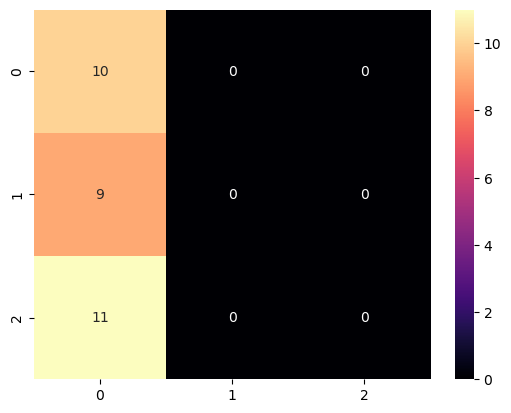

In [40]:
y_pred = mlp_2.predict(x_test)

mc = confusion_matrix(y_test, y_pred)

mc_heatmap = sns.heatmap(mc, cmap="magma", annot=True)

### Rede neural, 1 camada oculta, 20 neurônios

In [41]:
mlp_3 = MLPClassifier(hidden_layer_sizes=(20,), max_iter=100, alpha=1e-4,
                      solver="sgd", verbose=10, tol=1e-4, random_state=1,
                      learning_rate_init=.1)

In [42]:
mlp_3.fit(x_train, y_train)
print(mlp_3.score(x_train, y_train))
print("\n",mlp_3.score(x_test, y_test))

Iteration 1, loss = 1.32363234
Iteration 2, loss = 1.74523926
Iteration 3, loss = 2.24188643
Iteration 4, loss = 0.83299043
Iteration 5, loss = 0.70339755
Iteration 6, loss = 0.67968257
Iteration 7, loss = 0.58183360
Iteration 8, loss = 0.52645794
Iteration 9, loss = 0.48665809
Iteration 10, loss = 0.42036933
Iteration 11, loss = 0.38770423
Iteration 12, loss = 0.35582427
Iteration 13, loss = 0.33611091
Iteration 14, loss = 0.41047744
Iteration 15, loss = 1.16243011
Iteration 16, loss = 1.64160931
Iteration 17, loss = 0.35326009
Iteration 18, loss = 0.42275766
Iteration 19, loss = 0.37546974
Iteration 20, loss = 0.34383513
Iteration 21, loss = 0.30142052
Iteration 22, loss = 0.26267467
Iteration 23, loss = 0.23849488
Iteration 24, loss = 0.25076530
Iteration 25, loss = 0.49690075
Iteration 26, loss = 1.50376821
Iteration 27, loss = 0.39472705
Iteration 28, loss = 0.47396716
Iteration 29, loss = 0.42077587
Iteration 30, loss = 0.39285690
Iteration 31, loss = 0.38114855
Iteration 32, los

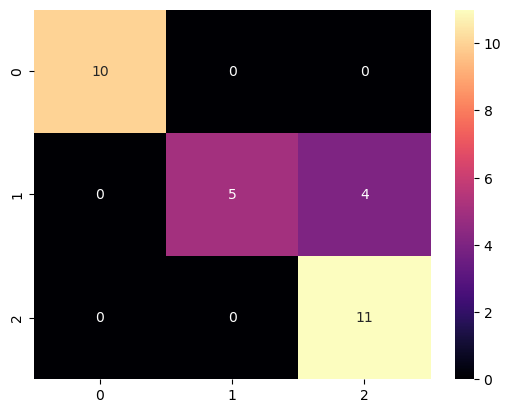

In [43]:
y_pred = mlp_3.predict(x_test)

mc = confusion_matrix(y_test, y_pred)

mc_heatmap = sns.heatmap(mc, cmap="magma", annot=True)

Aumentar o número de neurônios na camada oculta melhorou o desempenho, mas de forma quase desconsiderável. Enquanto isso, aumentar o número de camadas ocultas piorou severamente o desempenho.